In [1]:
# import modules
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt

# Import DataFrames

In [2]:
# get raw data
df = pd.read_csv('dataframes/pos_df.csv')
df.head()

,Sample Name,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),167.0000,143.0000,125.0000,132.0000,171.6091,182.9007,120.0000,120.0000,281.3523,...,130.0000,142.0000,68.0529,46.4729,88.0000,91.0000,229.5233,278.1255,206.0000,182.0000
1,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),53.2158,52.8015,47.4908,76.2783,27.6563,23.0569,9.0712,24.0712,0.0000,...,0.0000,2.1176,47.2560,62.7063,11.1856,0.0000,10.8768,6.0672,0.0000,34.4747
2,Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),167.8122,131.3388,220.0689,128.3439,342.9760,331.4596,268.9979,289.4925,295.0869,...,290.0353,223.3067,187.9922,219.2679,231.3212,219.2373,329.9421,313.2847,251.0406,226.8066
3,Hex2Cer 26:2;2 (LCB 18:0;2-H2O),54.0000,47.0000,39.0000,44.0000,74.0000,64.0000,84.5341,88.7361,70.0000,...,44.0000,37.0000,48.6404,51.9843,38.9995,52.0000,62.0000,57.0000,51.0000,40.0000
4,Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),391.2240,326.4641,444.7720,385.3202,175.0126,296.5953,238.6997,214.9442,215.1018,...,309.7805,272.9937,373.2111,292.2522,348.9607,348.3176,304.3199,271.4133,303.6544,253.3654


In [3]:
# get lipid metadata
df_meta = pd.read_csv('dataframes/pos_lipids_df_meta.csv')
df_meta.sample(5)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation
977,PE O-38:5 (LPE p),PE O,38,5
2071,PC 34:2 (LPC),PC,34,2
1387,NAPE 42:6+NH4 (-FA 13:3 (NH4)),NAPE,42,6
3519,"GM1 36:3;4 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)",GM1,36,3
359,"GT3 26:0;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)",GT3,26,0


In [4]:
# get experiment metadata
df_exps = pd.read_csv('dataframes/pos_exps_df_meta.csv')
df_exps.sample(5)

,sample,protein
5,CAV_A.1,CAV
9,CAVIN_A.1,CAVIN
38,WT_A,WT
33,SPTLC_B.1,SPTLC
23,CERS5-B.1,CERS5


# Principal Components Analysis (Transposed)

In [5]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [6]:
# drop the blank columns and transpose dataframe
samples = df["Sample Name"]
df_dropped = df.drop(["Sample Name", "RAJU-Blank", "RAJU-Blank.1"], axis=1)

df_dropped = df_dropped.T
exps = df_dropped.index

x = df_dropped.values

# for each column, standardize the values
x = StandardScaler().fit_transform(x)

# check random column for standardization (mean=0, standard deviation=1)
x.shape, np.mean(x[:,20]), np.std(x[:,20])

((40, 5479), 4.4408920985006264e-17, 1.0)

In [7]:
# create dataframe with standardized values
df_standardized = pd.DataFrame(x, columns=samples)
df_standardized = df_standardized.set_index(exps)
df_standardized.head(10)

Sample Name,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-H2O),Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),Hex2Cer 26:0;2 (LCB 18:0;2-H2O),Hex2Cer 26:4;3 (LCB 18:0;2-H2O),"Hex2Cer 26:4;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)",...,DAG 35:0+NH4 (-FA 17:0 (NH4)),DAG 38:4+NH4 (-FA 18:1 (NH4)),DAG 38:4+NH4 (-FA 20:3 (NH4)),DAG 38:4+NH4 (-FA 20:4 (NH4)),MADAG 38:2+NH4 (-FA 13:0 (NH4)),DAG 38:2+NH4 (-FA 16:1 (NH4)),MADAG 38:2+NH4 (-FA 16:2 (NH4)),DAG 38:2+NH4 (-FA 18:0 (NH4)),DAG 38:2+NH4 (-FA 18:1 (NH4)),MADAG 38:2+NH4 (-FA 18:2 (NH4))
CAS9-A,-0.119632,1.767019,-1.638565,0.206113,1.929826,0.169306,2.227004,0.471287,0.400821,-0.494894,...,-0.482176,-0.398903,-0.370975,-0.350245,-0.484760,-0.600253,-0.318859,-0.618937,-0.593602,-0.620205
CAS9-A.1,-0.553561,1.746037,-2.330926,-0.207008,1.015202,0.228176,-0.659004,-0.757276,-0.763288,-0.494894,...,-0.482176,-0.398903,-0.370975,-0.350245,-0.484760,-0.600253,-0.318859,-0.618937,-0.593602,-0.620205
CAS9-B,-0.879008,1.477073,-0.646596,-0.679147,2.686101,2.670966,-0.659004,0.207133,1.172339,-0.494894,...,-0.482176,-0.398903,-0.370975,-0.350245,-0.484760,-0.600253,-0.318859,-0.618937,-0.593602,-0.620205
CAS9-B.1,-0.752445,2.935033,-2.387777,-0.384060,1.846445,0.127014,2.050161,-0.757276,1.298701,2.624122,...,-0.482176,-0.398903,-0.370975,-0.350245,-0.484760,-0.600253,-0.318859,-0.618937,-0.593602,-0.620205
CAV_A,-0.036297,0.472543,1.686503,1.386459,-1.123793,0.761665,-0.659004,-0.757276,1.040952,-0.494894,...,3.019255,2.518582,2.754141,3.625649,1.846327,0.151630,2.785081,-0.100456,0.801032,1.933684
CAV_A.1,0.167859,0.239604,1.467892,0.796286,0.593356,0.310385,-0.659004,-0.757276,0.783203,1.409335,...,2.669112,3.887279,2.924216,-0.350245,-0.484760,0.452383,1.882117,0.634059,0.964328,2.275976
CAV_B,-0.969410,-0.468710,0.282205,2.008153,-0.224321,-0.329849,2.049686,-0.757276,-0.763288,-0.494894,...,1.531147,2.266454,2.860438,2.964777,1.740368,2.106525,-0.318859,0.979713,0.650977,1.529318
CAV_B.1,-0.969410,0.290974,0.671246,2.256143,-0.559827,1.425733,0.806763,-0.757276,-0.763288,-0.494894,...,1.239361,1.582106,2.924216,3.316531,1.263555,2.557654,-0.318859,0.893300,0.425893,1.430000
CAVIN_A,1.947901,-0.928126,0.777443,1.150389,-0.557601,0.745717,-0.659004,-0.757276,1.040952,0.929145,...,-0.482176,-0.398903,-0.370975,-0.350245,-0.484760,-0.600253,-0.318859,-0.618937,-0.593602,-0.620205
CAVIN_A.1,0.193994,-0.226649,-0.553325,0.029061,-0.563991,-0.949952,0.258598,1.358562,1.291696,-0.494894,...,-0.482176,-0.398903,-0.370975,-0.350245,1.210576,1.003763,2.446470,1.238954,-0.593602,1.779386


In [8]:
# do PCA
from sklearn.decomposition import PCA
pca_lipids = PCA(n_components=10)
principal_components = pca_lipids.fit_transform(x)

In [9]:
# create df with pca values

# create list of columns
pcs = []
for i in range(1,11):
    pcs.append('principal component ' + str(i))
# print(pcs)

# create df
df_pca = pd.DataFrame(principal_components, columns=pcs)
df_pca["sample"] = exps
df_pca = df_pca.merge(df_exps, on='sample')
df_pca

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,sample,protein
0,39.878235,-12.067790,44.488822,-13.144185,-9.655137,-1.159742,6.997357,-0.712065,-3.301170,8.333871,CAS9-A,CAS9
1,44.294375,-10.891719,43.856018,-13.817571,-10.486571,-2.157829,12.446846,-25.173598,57.621136,-5.070537,CAS9-A.1,CAS9
2,46.204291,-15.609485,41.279381,-35.841634,-20.756084,-0.678683,-0.659503,5.309641,-40.029753,3.673996,CAS9-B,CAS9
3,31.596659,-11.756522,27.868164,-23.690655,-8.994697,-5.122907,0.883381,6.605598,-14.177488,0.660527,CAS9-B.1,CAS9
4,-12.783223,-11.648976,-6.132711,-5.938198,-9.967771,21.533168,-25.518865,14.813557,10.699307,-6.964424,CAV_A,CAV
5,-15.285471,-12.540710,-6.140584,-3.517980,-8.323449,20.891022,-24.472974,9.406031,8.443357,-7.210582,CAV_A.1,CAV
6,-16.214749,-37.558242,24.661962,51.994635,1.711648,28.093953,4.087826,-12.278260,-12.078533,8.613614,CAV_B,CAV
7,-15.944114,-38.685733,23.554092,51.099368,-0.729483,27.765573,5.293619,-6.232941,-2.614841,0.184604,CAV_B.1,CAV
8,10.336387,14.019555,-1.823826,-1.726002,-3.129407,16.358509,-19.443558,2.486494,3.628627,5.915290,CAVIN_A,CAVIN
9,9.744325,12.661189,-3.868628,1.011261,0.083385,14.248365,-21.379910,3.411075,0.592000,12.548461,CAVIN_A.1,CAVIN


Explained variation per principal component: [0.12548334 0.08688734 0.0762355  0.06215896 0.04835117 0.04044309
 0.03531456 0.02904575 0.02825507 0.02632978]


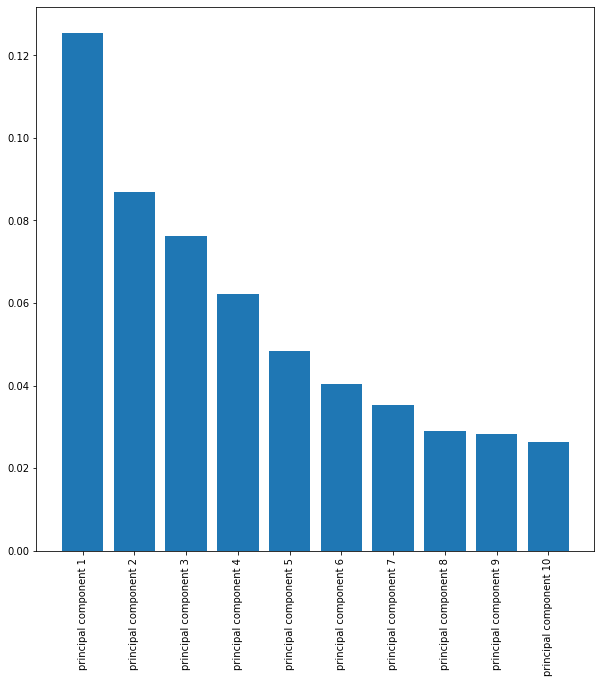

In [10]:
# find explained variance
explained_variance = pca_lipids.explained_variance_ratio_
print('Explained variation per principal component: {}'.format(explained_variance))

plt.figure(figsize=(10,10))
plt.bar(
    x=pcs,
    height=explained_variance
)
plt.xticks(rotation=90)
plt.show()

In [11]:
# which features contribute to the components. it has shape (n_components, n_features)
components_df = pd.DataFrame(pca_lipids.components_, columns=samples, index=pcs)
components_df

Sample Name,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),Hex2Cer 26:2;2 (LCB 18:0;2-H2O),Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),Hex2Cer 26:0;2 (LCB 18:0;2-H2O),Hex2Cer 26:4;3 (LCB 18:0;2-H2O),"Hex2Cer 26:4;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)","Hex2Cer 26:3;3 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)",...,DAG 35:0+NH4 (-FA 17:0 (NH4)),DAG 38:4+NH4 (-FA 18:1 (NH4)),DAG 38:4+NH4 (-FA 20:3 (NH4)),DAG 38:4+NH4 (-FA 20:4 (NH4)),MADAG 38:2+NH4 (-FA 13:0 (NH4)),DAG 38:2+NH4 (-FA 16:1 (NH4)),MADAG 38:2+NH4 (-FA 16:2 (NH4)),DAG 38:2+NH4 (-FA 18:0 (NH4)),DAG 38:2+NH4 (-FA 18:1 (NH4)),MADAG 38:2+NH4 (-FA 18:2 (NH4))
principal component 1,0.010857,0.011632,-0.006903,0.002078,0.018803,0.009102,-0.003802,-0.013509,-0.008662,-0.004966,...,-0.013687,-0.008373,-0.007989,-0.007368,0.003046,0.004320,-0.004505,0.013812,0.015866,0.004578
principal component 2,0.010005,0.003758,-0.001131,-0.013376,-0.008445,-0.012111,-0.008241,0.021876,0.021621,0.007333,...,0.009556,-0.017484,-0.018954,-0.019152,-0.009489,-0.007150,0.005930,0.003159,0.006402,0.001630
principal component 3,-0.031098,0.030400,-0.030791,-0.000048,0.024441,0.019991,0.027480,0.010378,0.018734,0.001895,...,0.017638,0.003485,0.007062,0.008168,-0.002582,-0.000001,0.006389,-0.009811,-0.012550,-0.002206
principal component 4,0.000921,-0.007853,0.008396,0.026362,-0.012174,0.009648,0.014054,-0.013627,-0.010776,-0.005616,...,0.013982,0.022529,0.026263,0.030176,0.031761,0.040193,0.002126,0.032509,0.027517,0.026324
principal component 5,-0.029389,-0.005276,-0.008691,-0.009501,0.015896,0.006691,0.012618,0.007159,-0.013292,-0.015699,...,0.005313,-0.010372,-0.007429,-0.006836,0.000462,0.004746,0.007317,0.012188,0.014008,0.008368
principal component 6,0.012564,-0.008521,0.017522,0.011939,-0.015217,-0.014705,-0.014664,0.002903,0.011119,-0.006894,...,0.026986,0.022588,0.031536,0.024885,0.005599,0.012032,0.007030,0.007053,0.008509,0.025330
principal component 7,-0.000361,-0.014193,-0.018140,-0.014035,-0.004051,-0.008515,0.001910,0.008579,-0.009455,-0.011139,...,-0.024025,-0.014799,-0.014006,-0.004556,0.006821,0.007280,-0.030312,0.008989,0.008588,-0.011833
principal component 8,-0.008185,-0.006717,-0.009290,-0.008333,0.017033,0.026019,0.011999,-0.009129,0.004973,-0.000748,...,0.008106,0.009009,0.004542,0.001362,0.003080,0.002266,0.035001,0.001812,0.002873,0.008953
principal component 9,0.002612,-0.002024,-0.008531,-0.000621,-0.007537,-0.006705,-0.011955,-0.013092,-0.014781,-0.001276,...,0.005704,0.003624,0.002050,-0.001422,-0.007904,-0.004452,0.019065,-0.003718,0.000500,0.004408
principal component 10,0.005155,-0.002149,-0.001759,0.002298,0.008379,-0.007641,0.019286,0.000448,0.009148,0.031930,...,-0.009486,-0.006543,-0.003721,-0.000455,0.005006,0.012819,0.037253,0.011247,0.005857,0.017976


# Graph PCA (Transposed)

In [12]:
import altair as alt

In [13]:
# chart principal components
click = alt.selection_point(fields=['protein'])

pca= alt.Chart(df_pca).mark_point().encode(
    x='principal component 1:Q',
    y='principal component 2:Q',
    color=alt.condition(click, 'protein:N', alt.value('lightgray')),
    tooltip=['sample', 'protein']
).properties(
    width=400,
    height=500,
    title='Principal Components Analysis'
).add_params(
    click
)

pca

alt.Chart(...)

# Confidence Ellipse

In [14]:
# add confidence ellipse
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

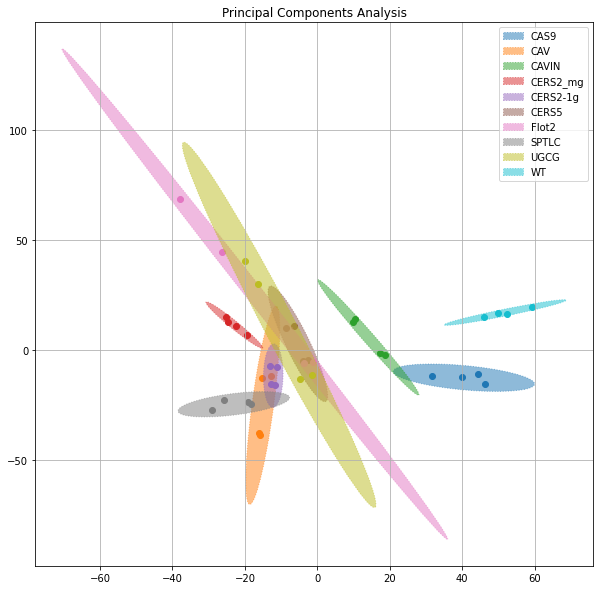

In [17]:
i = 0
fig, ax_nstd = plt.subplots(figsize=(10,10 ))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for protein in df_pca['protein'].unique():
    x = df_pca[df_pca['protein'] == protein]['principal component 1']
    y = df_pca[df_pca['protein'] == protein]['principal component 2']
    
    ax_nstd.scatter(x, y, color=colors[i])
    confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=protein, alpha=0.5, facecolor=colors[i], edgecolor=colors[i], linestyle=':')
    i += 1


ax_nstd.grid()
ax_nstd.legend()
ax_nstd.set_title('Principal Components Analysis')
plt.show()

In [ ]:
def confidence_ellipse_2(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    
    return ellipse

In [ ]:
fig,ax=plt.subplots(figsize=(1,1))
plt.scatter(x,y)
ell = confidence_ellipse(x, y, ax)
ax.add_patch(ell)

# Save Chart

In [ ]:
# save chart to html
# pca.save('graphs/pos_mode_whole_dataset/pca-transposed.html')